In [ ]:
# Set up coding environment by importing packages needed.
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import seaborn as sns

In [222]:
# import data and assign to variable
df_activity = pd.read_csv(r"C:\Users\1kevi\OneDrive\Documents\Case Studies\Bellabeat\data\dailyActivity_merged.csv", low_memory=False)

In [223]:
pd.set_option("display.max_columns",False)
pd.set_option("display.max_rows",False)

In [224]:
# Preview the first 10 rows of data
df_activity.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886
5,1503960366,3/30/2016,10970,7.16,7.16,0.0,2.36,0.51,4.29,0.0,30,13,223,1174,1820
6,1503960366,3/31/2016,12256,7.86,7.86,0.0,2.29,0.49,5.04,0.0,33,12,239,820,1889
7,1503960366,4/1/2016,12262,7.87,7.87,0.0,3.32,0.83,3.64,0.0,47,21,200,866,1868
8,1503960366,4/2/2016,11248,7.25,7.25,0.0,3.00,0.45,3.74,0.0,40,11,244,636,1843
9,1503960366,4/3/2016,10016,6.37,6.37,0.0,0.91,1.28,4.18,0.0,15,30,314,655,1850


In [225]:
# Check datatypes and for null values, and how many rows and columns the data contains
df_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397 entries, 0 to 1396
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        1397 non-null   int64  
 1   ActivityDate              1397 non-null   object 
 2   TotalSteps                1397 non-null   int64  
 3   TotalDistance             1397 non-null   float64
 4   TrackerDistance           1397 non-null   float64
 5   LoggedActivitiesDistance  1397 non-null   float64
 6   VeryActiveDistance        1397 non-null   float64
 7   ModeratelyActiveDistance  1397 non-null   float64
 8   LightActiveDistance       1397 non-null   float64
 9   SedentaryActiveDistance   1397 non-null   float64
 10  VeryActiveMinutes         1397 non-null   int64  
 11  FairlyActiveMinutes       1397 non-null   int64  
 12  LightlyActiveMinutes      1397 non-null   int64  
 13  SedentaryMinutes          1397 non-null   int64  
 14  Calories

In [226]:
# Change datatypes to correct datatypes
df_activity["Id"] = df_activity["Id"].astype("str")
df_activity["ActivityDate"] = pd.to_datetime(df_activity["ActivityDate"], format="%m/%d/%Y")
df_activity.dtypes


Id                                  object
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

In [227]:
# make all column names lowercase
df_activity.columns = df_activity.columns.str.lower()
df_activity.columns

Index(['id', 'activitydate', 'totalsteps', 'totaldistance', 'trackerdistance',
       'loggedactivitiesdistance', 'veryactivedistance',
       'moderatelyactivedistance', 'lightactivedistance',
       'sedentaryactivedistance', 'veryactiveminutes', 'fairlyactiveminutes',
       'lightlyactiveminutes', 'sedentaryminutes', 'calories'],
      dtype='object')

In [228]:
#rename columns for readability
df_activity.rename(columns={"activitydate":"activity_date", "totalsteps":"total_steps", "totaldistance":"total_distance", "trackerdistance":"tracker_distance",
       "loggedactivitiesdistance":"logged_activities_distance", "veryactivedistance":"very_active_distance",
       "moderatelyactivedistance":"moderately_active_distance", "lightactivedistance":"lightly_active_distance",
       "sedentaryactivedistance":"sedentary_active_distance", "veryactiveminutes":"very_active_minutes", "fairlyactiveminutes":"fairly_active_minutes",
       "lightlyactiveminutes":"lightly_active_minutes", "sedentaryminutes":"sedentary_minutes"}, inplace=True)
df_activity.columns

Index(['id', 'activity_date', 'total_steps', 'total_distance',
       'tracker_distance', 'logged_activities_distance',
       'very_active_distance', 'moderately_active_distance',
       'lightly_active_distance', 'sedentary_active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories'],
      dtype='object')

In [229]:
df_activity.head()

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,lightly_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
0,1503960366,2016-03-25,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,2016-03-26,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,2016-03-27,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,2016-03-28,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,2016-03-29,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [230]:
df_activity["day_of_week"] = df_activity["activity_date"].dt.day_name()
df_activity["n_day_of_week"] = df_activity["activity_date"].dt.weekday # 0=Monday, 6=Sunday
df_activity.head(5)


,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,lightly_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,day_of_week,n_day_of_week
0,1503960366,2016-03-25,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,Friday,4
1,1503960366,2016-03-26,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,Saturday,5
2,1503960366,2016-03-27,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,Sunday,6
3,1503960366,2016-03-28,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,Monday,0
4,1503960366,2016-03-29,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,Tuesday,1


In [231]:
# check for duplicate rows
df_activity.duplicated().sum()

np.int64(0)

In [232]:
# Subset the data
df_activity_sub = df_activity[["id", "activity_date", "total_steps", 
       "very_active_minutes", "fairly_active_minutes",
       "lightly_active_minutes", "sedentary_minutes", "calories","day_of_week", "n_day_of_week"]]
df_activity_sub.head()

,id,activity_date,total_steps,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,day_of_week,n_day_of_week
0,1503960366,2016-03-25,11004,33,12,205,804,1819,Friday,4
1,1503960366,2016-03-26,17609,89,17,274,588,2154,Saturday,5
2,1503960366,2016-03-27,12736,56,5,268,605,1944,Sunday,6
3,1503960366,2016-03-28,13231,39,20,224,1080,1932,Monday,0
4,1503960366,2016-03-29,12041,28,28,243,763,1886,Tuesday,1


In [403]:
df_activity_distance = df_activity[["id","activity_date","total_distance",
       "tracker_distance", "logged_activities_distance",
       "very_active_distance", "moderately_active_distance",
       "lightly_active_distance", "sedentary_active_distance",]]
df_activity_distance.head()

,id,activity_date,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,lightly_active_distance,sedentary_active_distance
0,1503960366,2016-03-25,7.11,7.11,0.0,2.57,0.46,4.07,0.0
1,1503960366,2016-03-26,11.55,11.55,0.0,6.92,0.73,3.91,0.0
2,1503960366,2016-03-27,8.53,8.53,0.0,4.66,0.16,3.71,0.0
3,1503960366,2016-03-28,8.93,8.93,0.0,3.19,0.79,4.95,0.0
4,1503960366,2016-03-29,7.85,7.85,0.0,2.16,1.09,4.61,0.0


In [234]:
# Get summary statistics for each varable
round(df_activity_sub.describe(),2)

,activity_date,total_steps,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,n_day_of_week
count,1397,1397.00,1397.00,1397.0,1397.00,1397.00,1397.00,1397.00
mean,2016-04-19 01:26:35.132426496,7280.90,19.68,13.4,185.37,992.54,2266.27,2.97
min,2016-03-12 00:00:00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
25%,2016-04-09 00:00:00,3146.00,0.00,0.0,111.00,729.00,1799.00,1.00
50%,2016-04-19 00:00:00,6999.00,2.00,6.0,195.00,1057.00,2114.00,3.00
75%,2016-04-30 00:00:00,10544.00,30.00,18.0,262.00,1244.00,2770.00,5.00
max,2016-05-12 00:00:00,36019.00,210.00,660.0,720.00,1440.00,4900.00,6.00
std,NaN,5214.34,31.68,26.4,114.06,313.30,753.01,1.99


In [235]:
df_activity_sub.sort_values(by="total_steps", ascending=False).head(20)

,id,activity_date,total_steps,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,day_of_week,n_day_of_week
88,1624580081,2016-05-01,36019,186,63,171,1020,2690,Sunday,6
1370,8877689391,2016-04-16,29326,94,29,429,888,4547,Saturday,5
1363,8877689391,2016-04-10,28497,128,46,211,1055,4526,Sunday,6
1384,8877689391,2016-04-30,27745,124,4,223,1089,4398,Saturday,5
1355,8877689391,2016-04-02,27572,116,24,260,1040,4220,Saturday,5
1159,8053475328,2016-04-03,25701,165,36,97,1142,3697,Sunday,6
1359,8877689391,2016-04-06,24136,87,16,318,1019,4039,Wednesday,2
1381,8877689391,2016-04-27,23629,93,8,235,1104,3808,Wednesday,2
1365,8877689391,2016-04-12,23186,85,7,312,1036,3921,Tuesday,1
...,...,...,...,...,...,...,...,...,...,...


In [236]:
# Find number of users over the time period
df_activity["id"].nunique()

35

In [238]:
df_activity_sub.sort_values(by="total_steps", ascending=False).head(20)

,id,activity_date,total_steps,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,day_of_week,n_day_of_week
88,1624580081,2016-05-01,36019,186,63,171,1020,2690,Sunday,6
1370,8877689391,2016-04-16,29326,94,29,429,888,4547,Saturday,5
1363,8877689391,2016-04-10,28497,128,46,211,1055,4526,Sunday,6
1384,8877689391,2016-04-30,27745,124,4,223,1089,4398,Saturday,5
1355,8877689391,2016-04-02,27572,116,24,260,1040,4220,Saturday,5
1159,8053475328,2016-04-03,25701,165,36,97,1142,3697,Sunday,6
1359,8877689391,2016-04-06,24136,87,16,318,1019,4039,Wednesday,2
1381,8877689391,2016-04-27,23629,93,8,235,1104,3808,Wednesday,2
1365,8877689391,2016-04-12,23186,85,7,312,1036,3921,Tuesday,1
...,...,...,...,...,...,...,...,...,...,...


In [ ]:
id_distances = df_activity_distance.groupby("id").agg({"very_active_distance":"sum", "moderately_active_distance":"sum", "lightly_active_distance":"sum", "sedentary_active_distance":"sum"})
id_distances = id_distances.mean()
id_distances

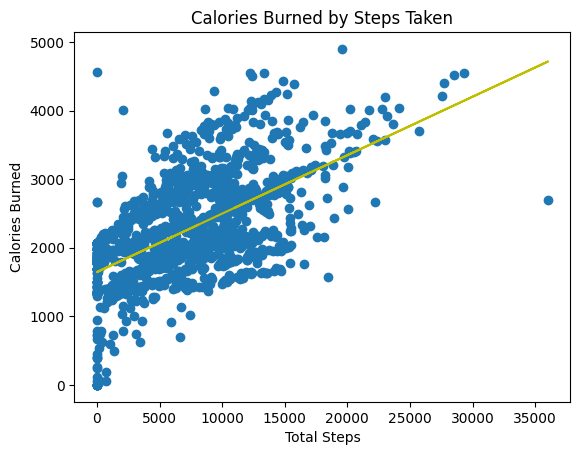

In [355]:
# Choose coordinates
x = df_activity_sub["total_steps"]
y = df_activity_sub["calories"]

# get trend line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Label the grayph 
plt.xlabel("Total Steps")
plt.ylabel("Calories Burned")

# Plot and show the graph
plt.scatter(x,y)
plt.plot(x,p(x),color="y")
plt.title("Calories Burned by Steps Taken")
plt.show()

In [313]:
# Columns you want to filter
cols = ["sedentary_minutes"]

# Create a dictionary to store the filtered DataFrames for each column
filtered_data = {}

# Loop through each column and apply the IQR outlier filtering
for col in cols:
    # Calculate Q1, Q3, and IQR for the current column
    Q1 = df_activity_sub[col].quantile(0.25)
    Q3 = df_activity_sub[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = (df_activity_sub[col] < lower_bound) | (df_activity_sub[col] > upper_bound)
    
    # Filter the DataFrame to exclude outliers for this column
    filtered_data[col] = df_activity_sub[~outliers]

# Assign the filtered DataFrames to individual variables
sd_filtered = filtered_data["sedentary_minutes"]


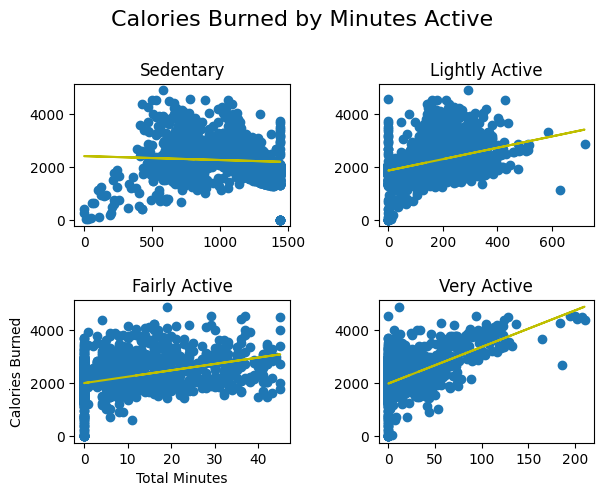

In [334]:
# set environment for subplots
figure, axis = plt.subplots(2, 2)

# subplot 1
x1 = sd_filtered["sedentary_minutes"]
y1 = sd_filtered["calories"]

# trend line 1
z1 = np.polyfit(x1, y1, 1)
p1 = np.poly1d(z1)

# subplot 2
x2 = df_activity_sub["lightly_active_minutes"]
y2 = df_activity_sub["calories"]

# trend line 2
z2 = np.polyfit(x2, y2, 1)
p2 = np.poly1d(z2)

# subplot 3
x3 = fa_filtered["fairly_active_minutes"]
y3 = fa_filtered["calories"]

# trend line 3
z3 = np.polyfit(x3, y3, 1)
p3 = np.poly1d(z3)

# subplot 4
x4 = df_activity_sub["very_active_minutes"]
y4 = df_activity_sub["calories"]

# trend line 4
z4 = np.polyfit(x4, y4, 1)
p4 = np.poly1d(z4)

axis[0, 0].scatter(x1,y1)
axis[0, 0].plot(x1, p1(x1), color="y")
axis[0, 0].set_title("Sedentary")

axis[0, 1].scatter(x2,y2)
axis[0, 1].plot(x2, p2(x2), color="y")
axis[0, 1].set_title("Lightly Active")

axis[1, 0].scatter(x3,y3)
axis[1, 0].plot(x3, p3(x3), color="y")
axis[1, 0].set_xlabel("Total Minutes")
axis[1, 0].set_ylabel("Calories Burned")
axis[1, 0].set_title("Fairly Active")

axis[1, 1].scatter(x4,y4)
axis[1, 1].plot(x4, p4(x4), color="y")
axis[1, 1].set_title("Very Active")

figure.tight_layout(pad=2.0)
figure.suptitle("Calories Burned by Minutes Active", fontsize=16, y=1.05)
plt.show()

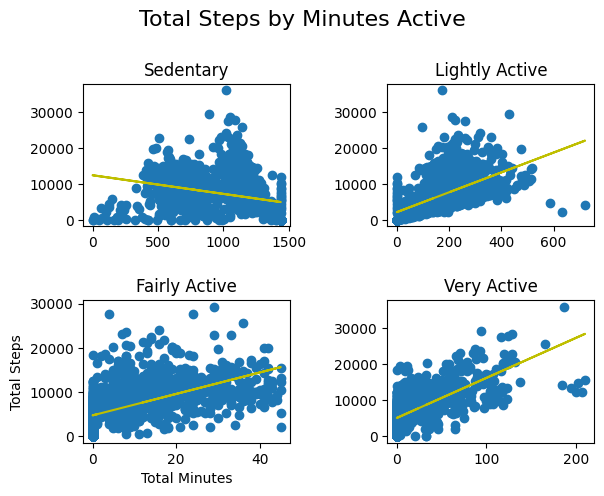

In [353]:
df_activity_sub# set environment for subplots
figure, axis = plt.subplots(2, 2)

# subplot 1
x1 = sd_filtered["sedentary_minutes"]
y1 = sd_filtered["calories"]

# trend line 1
z1 = np.polyfit(x1, y1, 1)
p1 = np.poly1d(z1)

# subplot 2
x2 = df_activity_sub["lightly_active_minutes"]
y2 = df_activity_sub["total_steps"]

# trend line 2
z2 = np.polyfit(x2, y2, 1)
p2 = np.poly1d(z2)

# subplot 3
x3 = fa_filtered["fairly_active_minutes"]
y3 = fa_filtered["total_steps"]

# trend line 3
z3 = np.polyfit(x3, y3, 1)
p3 = np.poly1d(z3)

# subplot 4
x4 = df_activity_sub["very_active_minutes"]
y4 = df_activity_sub["total_steps"]

# trend line 4
z4 = np.polyfit(x4, y4, 1)
p4 = np.poly1d(z4)

axis[0, 0].scatter(x1,y1)
axis[0, 0].plot(x1, p1(x1), color="y")
axis[0, 0].set_title("Sedentary")

axis[0, 1].scatter(x2,y2)
axis[0, 1].plot(x2, p2(x2), color="y")
axis[0, 1].set_title("Lightly Active")

axis[1, 0].scatter(x3,y3)
axis[1, 0].plot(x3, p3(x3), color="y")
axis[1, 0].set_xlabel("Total Minutes")
axis[1, 0].set_ylabel("Total Steps")
axis[1, 0].set_title("Fairly Active")

axis[1, 1].scatter(x4,y4)
axis[1, 1].plot(x4, p4(x4), color="y")
axis[1, 1].set_title("Very Active")

figure.tight_layout(pad=2.0)
figure.suptitle("Total Steps by Minutes Active", fontsize=16, y=1.05)
plt.show()

In [397]:
df_weekday_grouped = df_activity_sub.groupby("day_of_week").agg({"very_active_minutes":"mean","fairly_active_minutes":"mean", "lightly_active_minutes":"mean", "sedentary_minutes":"mean"})
df_weekday_grouped

,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes
day_of_week,,,,
Friday,18.567839,15.819095,194.668342,1020.266332
Monday,21.606383,12.696809,184.675532,1029.718085
Saturday,20.809045,14.216080,200.693467,968.934673
Sunday,18.253886,12.544041,170.093264,999.730570
Thursday,18.923077,12.579487,180.953846,984.902564
Tuesday,19.773333,12.551111,177.120000,956.386667
Wednesday,19.858586,13.444444,189.919192,994.712121


In [414]:
avg_activity_mins = df_activity_sub.agg({"very_active_minutes":"mean","fairly_active_minutes":"mean", "lightly_active_minutes":"mean", "sedentary_minutes":"mean"})
avg_activity_mins

very_active_minutes        19.679313
fairly_active_minutes      13.403006
lightly_active_minutes    185.372942
sedentary_minutes         992.542591
dtype: float64

In [415]:
avg_activity_mins.sort_values(ascending=False, inplace=True)
avg_activity_mins = pd.DataFrame(avg_activity_mins)
avg_activity_mins.columns = ["average_mins"]
avg_activity_mins.index.name = "activity"
avg_activity_mins = avg_activity_mins.reset_index()
avg_activity_mins

,activity,average_mins
0,sedentary_minutes,992.542591
1,lightly_active_minutes,185.372942
2,very_active_minutes,19.679313
3,fairly_active_minutes,13.403006


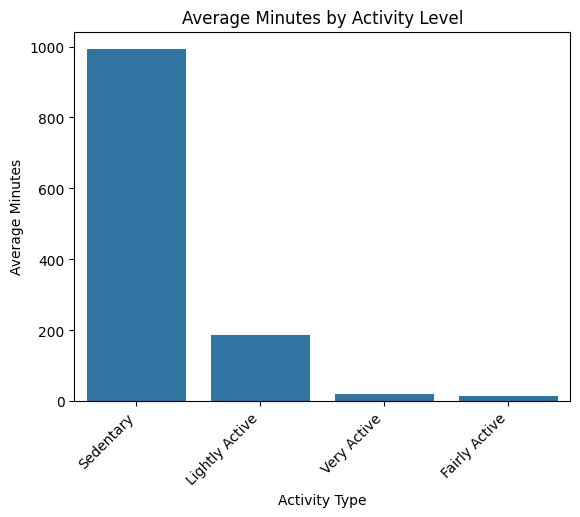

In [418]:
# Your barplot code
sns.barplot(data=avg_activity_mins, x="activity", y="average_mins")

# Rename the x and y-axis labels
plt.xlabel('Activity Type')  # Rename the x-axis label
plt.ylabel('Average Minutes')  # Rename the y-axis label

# Rotate x-axis labels to avoid overlap
plt.xticks(ticks=range(len(["Sedentary", "Lightly Active", "Very Active", "Fairly Active"])), labels=["Sedentary", "Lightly Active", "Very Active", "Fairly Active"], rotation=45, ha="right")  # You can adjust the angle as needed

# Show the plot
plt.title("Average Minutes by Activity Level")
plt.show()

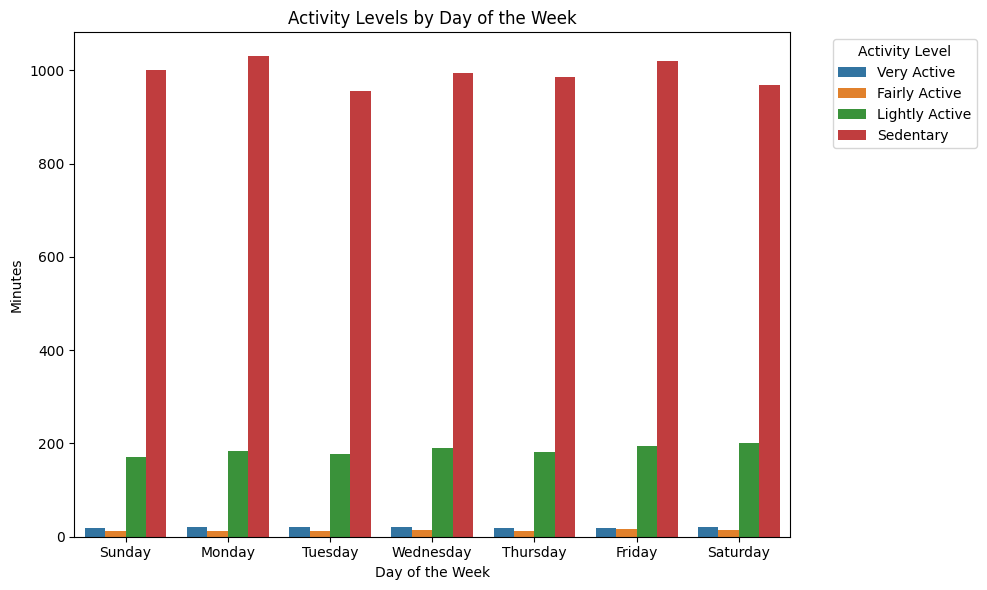

In [399]:
# Reshape the DataFrame to long format
df_long = df_weekday_grouped.reset_index().melt(id_vars="day_of_week", value_vars=df_weekday_grouped.columns, var_name="activity_level", value_name="minutes")

# Reorder the days to be from Sunday to Saturday
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df_long['day_of_week'] = pd.Categorical(df_long['day_of_week'], categories=day_order, ordered=True)

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='minutes', hue='activity_level', data=df_long)

# Define the mapping for the activity levels to more readable names
activity_mapping = {
    'very_active_minutes': 'Very Active',
    'fairly_active_minutes': 'Fairly Active',
    'lightly_active_minutes': 'Lightly Active',
    'sedentary_minutes': 'Sedentary'
}

# Update the legend labels using the mapping
handles, labels = plt.gca().get_legend_handles_labels()
labels = [activity_mapping.get(label, label) for label in labels]  # Replace with mapped values

# Set plot labels and title
plt.title("Activity Levels by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Minutes")
plt.legend(handles, labels, title="Activity Level", bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


In [361]:
df_activity_distance.drop(columns=["activity_date", "id", "total_distance", "tracker_distance", "logged_activities_distance", "sedentary_active_distance"], inplace=True)
df_activity_distance

C:\Users\1kevi\AppData\Local\Temp\ipykernel_22744\2319525683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_activity_distance.drop(columns=["activity_date", "id", "total_distance", "tracker_distance", "logged_activities_distance"], inplace=True)


,very_active_distance,moderately_active_distance,lightly_active_distance,sedentary_active_distance
0,2.57,0.46,4.07,0.00
1,6.92,0.73,3.91,0.00
2,4.66,0.16,3.71,0.00
3,3.19,0.79,4.95,0.00
4,2.16,1.09,4.61,0.00
5,2.36,0.51,4.29,0.00
6,2.29,0.49,5.04,0.00
7,3.32,0.83,3.64,0.00
8,3.00,0.45,3.74,0.00
...,...,...,...,...


In [419]:
df_activity_distance_means = id_distances
df_activity_distance_means.sort_values(ascending=False, inplace=True)
df_activity_distance_means = pd.DataFrame(df_activity_distance_means)
df_activity_distance_means.columns = ["average_distance"]
df_activity_distance_means.index.name = "activity"
df_activity_distance_means = df_activity_distance_means.reset_index()
df_activity_distance_means

,activity,average_distance
0,lightly_active_distance,127.462571
1,very_active_distance,55.776857
2,moderately_active_distance,21.492286
3,sedentary_active_distance,0.068000


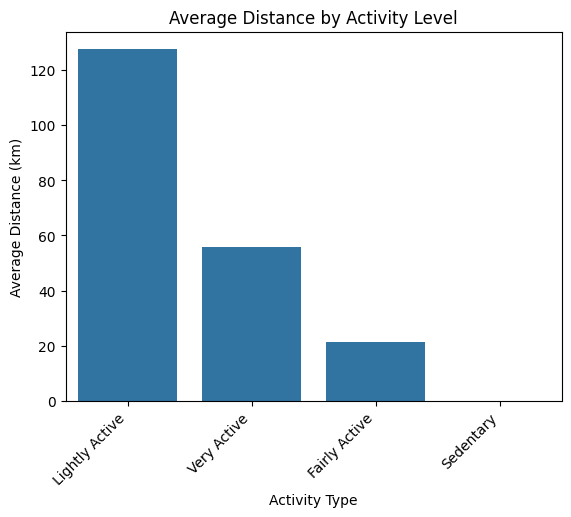

In [420]:
# Your barplot code
sns.barplot(data=df_activity_distance_means, x="activity", y="average_distance")

# Rename the x and y-axis labels
plt.xlabel('Activity Type')  # Rename the x-axis label
plt.ylabel('Average Distance (km)')  # Rename the y-axis label

# Rotate x-axis labels to avoid overlap
plt.xticks(ticks=range(len(["Lightly Active", "Very Active", "Fairly Active", "Sedentary"])), labels=["Lightly Active", "Very Active", "Fairly Active", "Sedentary"], rotation=45, ha="right")  # You can adjust the angle as needed

# Show the plot
plt.title("Average Distance by Activity Level")
plt.show()